# Lucas Weston - Assignment 12
# Data Curation

Import data and create dataframe

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = 'sample_data/titanic.csv'
df = pd.read_csv(path)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


1. Write a Pandas program to split the titanic dataframe by passenger class ('class') and get mean value, median value, min value, and max value of (1) age, (2) fare for each passenger class (3 points). Also, calculate for each passenger class, how many passengers' age and fare are known (i.e., have non-null entries) in the same output dataframe (1 point).

In [3]:
dfGrouped = df.groupby('class')

dfStats = dfGrouped[['age', 'fare']].agg(['mean', 'median', 'min', 'max'])

nonNull = dfGrouped[['age', 'fare']].count()

dfStats = dfStats.join(nonNull, rsuffix='_count')
dfStats

<ipython-input-3-eb0bb4ad6d7e>:7: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  dfStats = dfStats.join(nonNull, rsuffix='_count')


,"(age, mean)","(age, median)","(age, min)","(age, max)","(fare, mean)","(fare, median)","(fare, min)","(fare, max)",age,fare
class,,,,,,,,,,
First,38.233441,37.0,0.92,80.0,84.154687,60.2875,0.0,512.3292,186,216
Second,29.877630,29.0,0.67,70.0,20.662183,14.2500,0.0,73.5000,173,184
Third,25.140620,24.0,0.42,74.0,13.675550,8.0500,0.0,69.5500,355,491


2. What is the probability of survival for each passenger class (1 point)?

In [ ]:
survival_probability = df.groupby('class')['survived'].mean()
survival_probability

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

3. What is the probability of survival for men, women, and children (Hint: Use column 'who') (1 point)?

In [4]:
survivalProb = df.groupby('who')['survived'].mean()
survivalProb

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

4. For each combination of town of embarkment and deck, calculate (1) the number of people who belonged to the combination (if any) and (2) the number of people who survived (2 points)

In [ ]:
dfEmbagroup = df.groupby(['embark_town', 'deck'])

total = dfEmbagroup.size()
survivors = dfEmbagroup['survived'].sum()
embaStats = pd.DataFrame({'Total People': total, 'Survivors': survivors})

embaStats.reset_index(inplace=True)
embaStats.sort_values(by=['embark_town', 'deck'])

,embark_town,deck,Total People,Survivors
0,Cherbourg,A,7,4
1,Cherbourg,B,22,17
2,Cherbourg,C,21,14
3,Cherbourg,D,13,11
4,Cherbourg,E,5,5
5,Cherbourg,F,1,1
6,Queenstown,C,2,1
7,Queenstown,E,1,1
8,Queenstown,F,1,0
9,Southampton,A,8,3


5. Draw a category plot (bar plot) with passenger class on x-axis, 'survived' on y-axis, and gender as hue. Explain in your own words what insights this plot gives you about the probability of survival based on gender and passenger class (2 points).

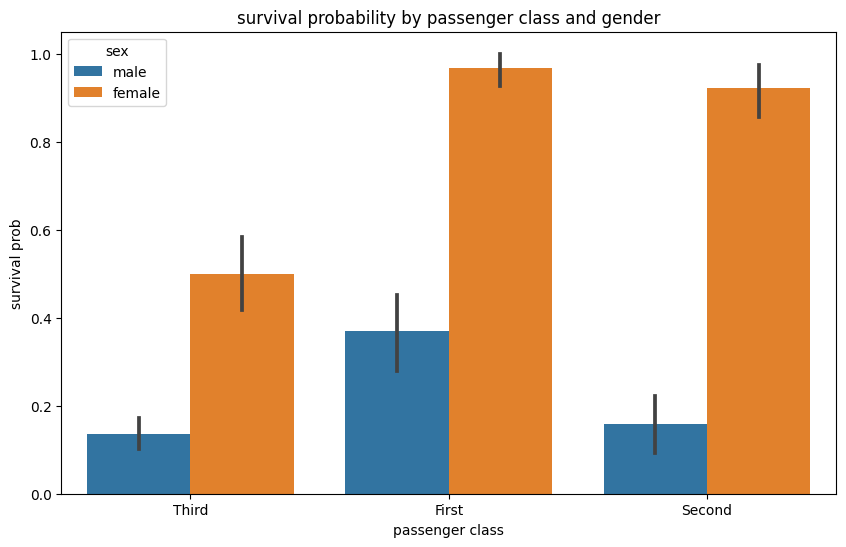

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='survived', hue='sex', data=df)

plt.title('survival probability by passenger class and gender')
plt.xlabel('passenger class')
plt.ylabel('survival prob')

plt.show()